# Normalizing Flows
## A short stroll from discrete to continuous time
<br><br>
## Aalto University, EEA
Adrien Corenflos, 26.10.2020 🎂

# Outline

1. Generative models

2. Problem formulation

3. Discrete time normalizing flows

4. Continuous time normalizing flows

# Generative models

## Definition

Statistical models are usually divided in two classes: discriminative and generative <cite>[1, Ch.2]</cite>.

- discriminative:<br>
    Discriminative models are a class of statistical models encode the conditional distribution of the observation given the input
    $$
    \begin{equation}
        \mathbb{P}(Y \mid X)
    \end{equation}
    $$
    


- generative:<br>
    Generative models on the other end encode the joint distribution of the input and the observation
    $$
    \begin{equation}
        \mathbb{P}(X, Y)
    \end{equation}
    $$

## Some examples:

| Discriminative | Generative |
| --- | --- |
| Logistic regression | Naive Bayes classifier |
| Support vector machines | Gaussian Processes |
| Decision trees | Bayesian Networks | 
| Neural Networks | ? |

# Problem formulation

## The data generation problem

We will consider the two following problems:


1. Given a series of observations $Y_n$'s, how do we calibrate a probabilistic model that is able to generate "similar" data?
    For example, how can we generate handwritten numbers:

In [21]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

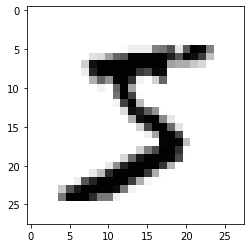

In [22]:
import matplotlib.pyplot as plt
_ = plt.imshow(1 - X[0].reshape(28, 28), cmap="gray")

2. Given a complicated likelihood function how do we sample from it? For example:

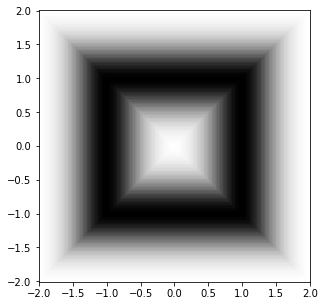

In [60]:
def square(x, y):
    abs_x = np.abs(x)
    abs_y = np.abs(y)
    return 0.25 * np.exp(-4*(np.maximum(abs_x, abs_y) - 1) ** 2) / np.sqrt(np.pi)

def plot_square():
    linspace = np.linspace(-2., 2., 200)
    mesh_x, mesh_y = np.meshgrid(linspace, linspace)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect("equal")
    _ = ax.pcolormesh(mesh_x, mesh_y, 1. - square(mesh_x, mesh_y), cmap="gray", shading='auto')

plot_square()

## Non exhaustive solutions

1. Data registration:  
    a. Variational auto-encoders  
    b. Generative adversarial networks  
    c. Normalizing flows

2. Distribution sampling:  
    a. MCMC  
    b. Normalizing flows

1.a. VAE  
    Learn a latent representation of the distribution 
    ![image-4.png](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

Image from Wikimedia. To go further see [2].

1.b. GAN  
    Learn to fool a expert networks, or more recently learn to minimize Wasserstein distance between true and generated. 
    $$\underset{\theta}{\min} \mathcal{W}\bigg(G_\theta, [Y_n]_{n=1}^N\bigg)$$
    
To go further see [3].

2.a. MCMC  
    Acceptance-rejection method for exact sampling. 

In [78]:
def mh(f, n=1000, seed=0):
    rng = np.random.RandomState(seed)
    arr = np.empty((n, 2))
    x, y = rng.uniform(-1, 1, 2)
    p = f(x, y)
    for i in range(n):
        eps_x, eps_y = rng.uniform(-1, 1, 2)
        xi, yi = x + eps_x, y + eps_y
        pi = f(xi, yi)
        if rng.rand() <= pi / p:
            x, y = xi, yi
            p = pi
        arr[i] = x, y
    return arr

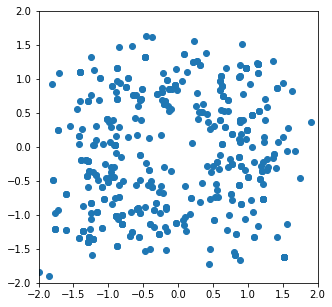

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-2, 2), ax.set_ylim(-2, 2)
_ = ax.scatter(*mh(square, 500).T)

# Discrete time normalizing flows

Clearly the main 

2. Variational auto-encoders

3. Generative adversorial networks

In [ ]:
data = np.random.randn(2, 500)
sizes = np.abs(data[1])
fig, ax = plt.subplots()
ax.scatter(*data, s=sizes * 100, c=sizes, cmap=plt.cm.viridis, vmin=-3, vmax=3)
ax.set(title="Wow, such plot. So scatter. Much viridis.")
ax.set_axis_off()

You can even change the code and update the plot in real-time!

Let's see what these notebooks look like...

github.com/binder-examples/requirements
github.com/binder-examples/jupyterlab

# References

[1]: Jebara, Tony. Machine Learning: Discriminative and Generative, Springer US, 2004.  
[2]: Doersch, Carl. Tutorial on variational autoencoders, arXiv:1606.05908.  
[3]: Genevay, Aude and al. Learning Generative Models with Sinkhorn Divergences, AISTATS, 2018.

In [ ]:
@InProceedings{pmlr-v84-genevay18a, title = {Learning Generative Models with Sinkhorn Divergences}, author = {Aude Genevay and Gabriel Peyre and Marco Cuturi}, pages = {1608--1617}, year = {2018}, editor = {Amos Storkey and Fernando Perez-Cruz}, volume = {84}, series = {Proceedings of Machine Learning Research}, address = {Playa Blanca, Lanzarote, Canary Islands}, month = {09--11 Apr}, publisher = {PMLR}, pdf = {http://proceedings.mlr.press/v84/genevay18a/genevay18a.pdf}, url = {http://proceedings.mlr.press/v84/genevay18a.html}, abstract = {The ability to compare two degenerate probability distributions, that is two distributions supported on low-dimensional manifolds in much higher-dimensional spaces, is a crucial factor in the estimation of generative mod- els.It is therefore no surprise that optimal transport (OT) metrics and their ability to handle measures with non-overlapping sup- ports have emerged as a promising tool. Yet, training generative machines using OT raises formidable computational and statistical challenges, because of (i) the computational bur- den of evaluating OT losses, (ii) their instability and lack of smoothness, (iii) the difficulty to estimate them, as well as their gradients, in high dimension. This paper presents the first tractable method to train large scale generative models using an OT-based loss called Sinkhorn loss which tackles these three issues by relying on two key ideas: (a) entropic smoothing, which turns the original OT loss into a differentiable and more robust quantity that can be computed using Sinkhorn fixed point iterations; (b) algorithmic (automatic) differentiation of these iterations with seam- less GPU execution. Additionally, Entropic smoothing generates a family of losses interpolating between Wasserstein (OT) and Energy distance/Maximum Mean Discrepancy (MMD) losses, thus allowing to find a sweet spot leveraging the geometry of OT on the one hand, and the favorable high-dimensional sample complexity of MMD, which comes with un- biased gradient estimates. The resulting computational architecture complements nicely standard deep network generative models by a stack of extra layers implementing the loss function.} }